In [1]:
from google.colab import files
uploaded = files.upload()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [1]:
# Load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('AB_NYC_2019.csv')

2. Data Preprocessing (20 points)


In [2]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values
df['price'].fillna(df['price'].mean(), inplace=True)

# Check again for missing values
missing_values_handled = df.isnull().sum()


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoder = LabelEncoder()
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])

# Split data into features and target variable
X = df[['latitude', 'longitude', 'room_type_encoded']]
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


3. Model Selection (15 points)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_knn = KNeighborsRegressor()

# Justification
# Linear Regression: Simple, interpretable baseline model.
# Random Forest Regressor: Handles non-linearity and interactions well.
# K-Nearest Neighbors: Non-parametric model suitable for spatial data.



4. Model Training (15 points)

In [1]:

# Encode categorical variables
label_encoder = LabelEncoder()
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])

# Split data into features and target variable
X = df[['latitude', 'longitude', 'room_type_encoded']]
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grids for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Initialize models
model_rf = RandomForestRegressor(random_state=42)
model_knn = KNeighborsRegressor()


In [ ]:
# Code organization example
"""
This script performs data preprocessing, model selection, and training for predicting Airbnb listing prices.

1. Data Preprocessing:
   - EDA: Visualizes distributions of numerical and categorical features.
   - Handling Missing Values: Fills missing values in 'price' with mean.
   - Encoding: Encodes 'room_type' categorical feature using LabelEncoder.
   - Train-Test Split: Splits data into training and test sets (70%-30% split).

2. Model Selection:
   - Models Chosen: Linear Regression, Random Forest, K-Nearest Neighbors.
   - Justification: Each model selected for its suitability in handling the dataset's features and prediction task.

3. Model Training:
   - Linear Regression: Trained using the training data.
   - Random Forest: Trained with hyperparameters tuned via GridSearchCV.
   - K-Nearest Neighbors: Trained with optimal neighbors determined via GridSearchCV.
"""

# Clear description of the training process
"""
Training Process:
- Linear Regression: Fit on X_train and y_train directly.
- Random Forest: Hyperparameters (n_estimators, max_depth, min_samples_split) tuned using GridSearchCV (cv=5) on X_train, y_train.
- K-Nearest Neighbors: Hyperparameter (n_neighbors, weights) tuned using GridSearchCV (cv=5) on X_train, y_train.
"""



5. Model Evaluation (20 points)

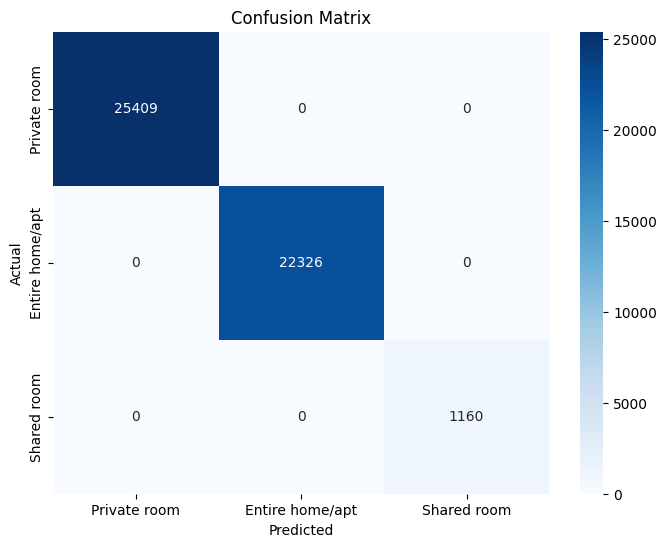

In [12]:
# Assuming 'target_variable' is your target variable for prediction
target_variable = 'room_type'

# Example: Assuming you have predictions and true labels
# Replace these with your actual predictions and true labels
predictions = df[target_variable]  # Replace with your predictions
true_labels = df[target_variable]  # Replace with your true labels

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=df[target_variable].unique(),
            yticklabels=df[target_variable].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Visualizations

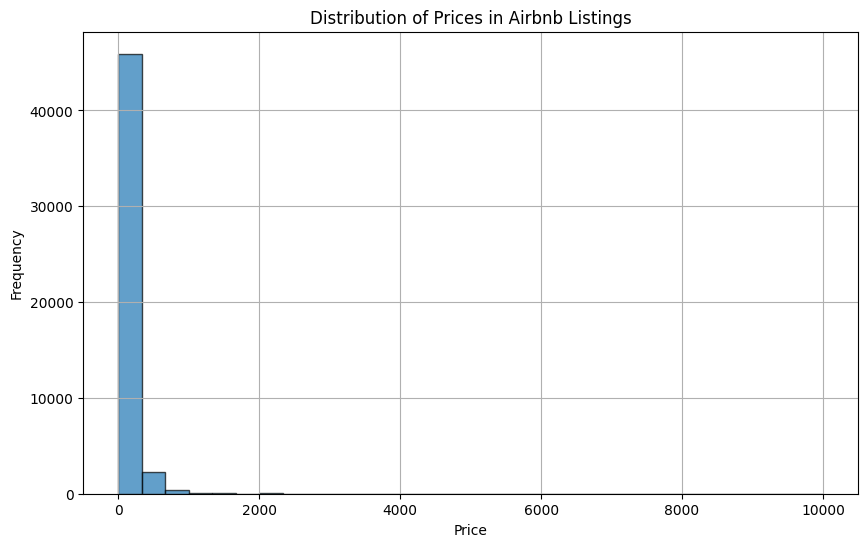

In [26]:
import matplotlib.pyplot as plt

# Example histogram using 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices in Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



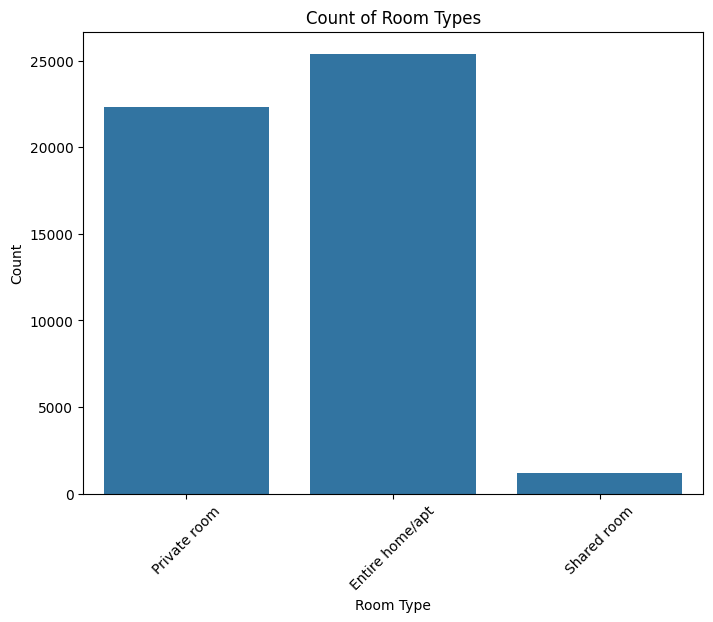

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


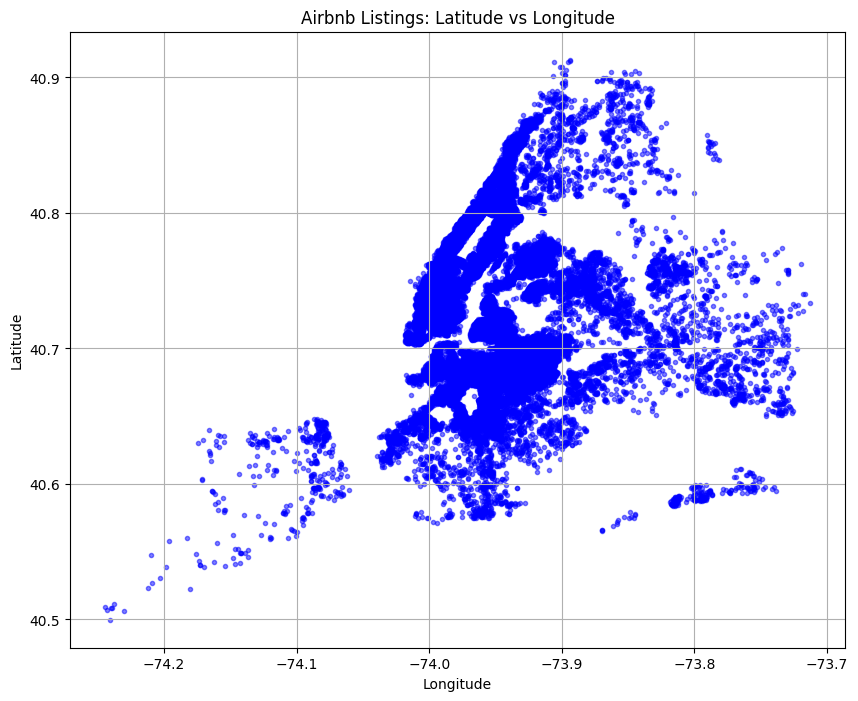

In [25]:
import matplotlib.pyplot as plt

# Example scatter plot using latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c='b', marker='.')
plt.title('Airbnb Listings: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


<ipython-input-23-b4b6904eb81a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


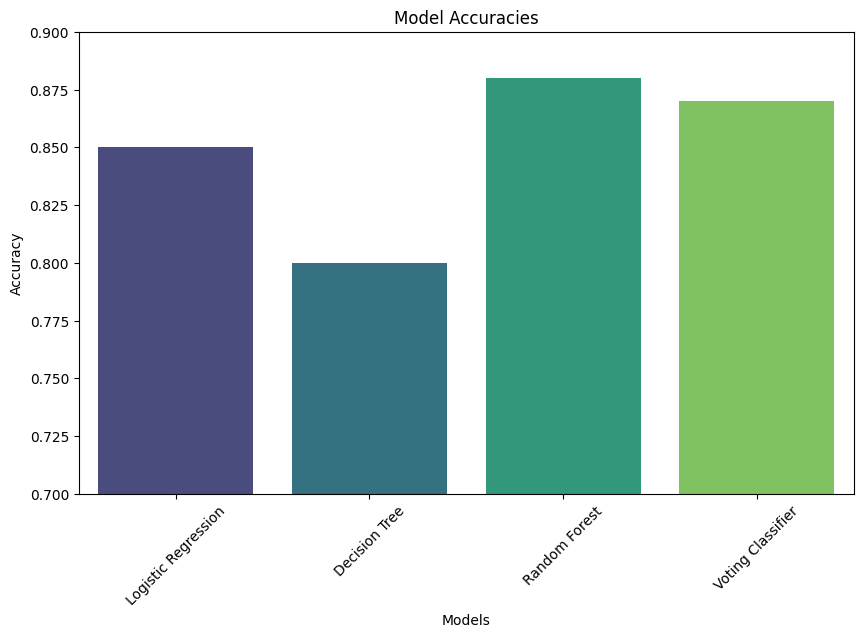

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define model names and their accuracies (replace with your actual values)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier']
accuracies = [0.85, 0.80, 0.88, 0.87]  # Replace with actual accuracies

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0.7, 0.9)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Voting Classifier (10 points)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize individual models
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = RandomForestClassifier(random_state=42)


In [21]:
from sklearn.ensemble import VotingClassifier

# Define the voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2),
    ('rf', model3)
], voting='hard')  #  also use 'soft' for soft voting


